Import this module, the module name will be abbreviated to qc2 and sv2 for ease of use and reading

In [16]:
from qiskit_extension.quantum_circuit2 import QuantumCircuit2 as qc2
from qiskit_extension.state_vector2 import StateVector2 as sv2

## QuantumCircuit2 Basic Operation
The QuantumCircuit2 object is used to create a quantum circuit and only to operate the StateVector2 object (simulates the state change of a quantum after passing through a circuit)

### Initialize a 2 qubit quantum circuit

In [17]:
circuit_EPR = qc2(2)

### Add different gate to the circuit, then draw the circuit

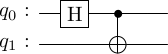

In [18]:
# 1. put a Hadamard gate in the qubit 0 position
circuit_EPR.h(0)

# 2. put a CNOT gate, control qubit 0, target qubit 1
circuit_EPR.cx(0, 1)

# 3. draw the circuit
circuit_EPR.show_circ()

### to_matrix(): Converts the circuit into a matrix (this matrix is the unitary matrix of the quantum circuit, stored in the form of np.array)

In [19]:
circuit_EPR.to_matrix()

array([[ 0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
         0.70710678+0.j],
       [ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
        -0.70710678+0.j],
       [ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
         0.        +0.j]])

### show_matrix(): Turn the matrix ( from to_matrix() ) into a more readable form

In [20]:
circuit_EPR.show_matrix()

<IPython.core.display.Latex object>

## StateVector2 basic operations
StateVector2 object, store state vector and provides related operations (such as measuring, putting in a quantum circuit to get a new state vector, etc.)

### from_label(): Create an sv2 object with a symbol, and display the state with show_state()

In [21]:
# Create a state vector of |00>
state00 = sv2.from_label('00')

# Show the state of this sv2 object 
state00.show_state()

<IPython.core.display.Latex object>

In [22]:
# Create state vector: 2( √2|0> + |+> - |-> )
state_x0 = sv2.from_label((2**0.5, "0"), "+",(-1,"-"))

# Show the state of this sv2 object
state_x0.show_state()

<IPython.core.display.Latex object>

### to_matrix(): convert state vector to matrix

In [23]:
state00.to_matrix()

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

In [24]:
state_x0.to_matrix()

array([[0.70710678+0.j],
       [0.70710678+0.j]])

### show_matrix(): displays the matrix as a latex matrix

In [25]:
state00.show_matrix()

<IPython.core.display.Latex object>

In [26]:
state_x0.show_matrix()

<IPython.core.display.Latex object>

### evolve(): evolve state vector by quantum circuit

In [27]:
# The state of |00> after the EPR circuit
state_EPR = state00.evolve(circuit_EPR)

# Show the state of this sv2 object
state_EPR.show_state()

<IPython.core.display.Latex object>

### show_measure(): Perform the measurement, and display the measurement result and the corresponding post-measurement state

In [28]:
# Create a GHZ state
state_GHZ = sv2.from_label("000", "111")

# Measure the first qubit of the GHZ state, and display the result
state_GHZ.show_measure(0)

<IPython.core.display.Latex object>

### measure(): performs the measurement, and returns the measurement result and the corresponding post-measurement state
measure() returns the value as a list, where \
list[0b00] = state (StateVector2 object) after measure, and the measurement result = 00, \
list[0b01] = state (StateVector2 object) after measure, and the measurement result = 01, \
...

In [29]:
# After measuring the first and second qubits of the EPR pair, the state vector corresponding to each measurement result is stored in a list
list_after_measure_bit01 = state_GHZ.measure([0,1])

# Show the state vector after measured and the measurement result = 00
list_after_measure_bit01[0b00].show_state()

<IPython.core.display.Latex object>

In [30]:
# This is None, because the GHZ measurement of the 0,1 qubit, the result of 00 is not possible
list_after_measure_bit01[0b01] is None

True

## X,Y basis operations
### Display state vector with different basis

In [31]:
# show_state() preset to show state in z-basis
state_x0.show_state() # 1/√2(|0>+|1>)

# Show state with X basis
state_x0.show_state(basis='x') # |+>

# Automatically determine the basis (show the basis with the smallest entropy)
state_x0.show_state(basis="") # |+>

<IPython.core.display.Latex object>

### Measure the state vector with different basis

In [32]:
# measure() / show_measure() preset to measure in Z basis
state_GHZ.show_measure(0)  # |0>: |00>, |1>: |11>

# Measure in X basis
state_GHZ.show_measure(0, basis='x')  # |+>: 1/√2(|00>+|11>), |->: 1/√2(|00>-|11>)

<IPython.core.display.Latex object>